**Original Code without any changing:**

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        4160      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        4160  

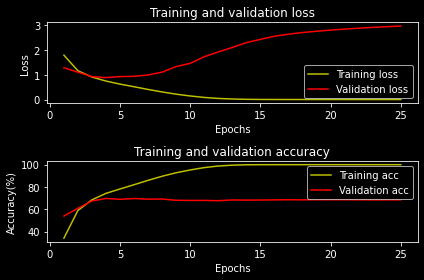

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('dark_background')

import keras
from keras.datasets import cifar10
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import os
from keras.layers import Flatten, Dense
from keras.optimizers import SGD
from keras.layers import Input
from keras.models import Model

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


input_img = Input(shape = (32, 32, 3))


tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_1)
tower_1 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_1)
tower_1 = MaxPooling2D((3,3), strides=(1,1), padding='same')(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_1)

output = Flatten()(tower_1)
out    = Dense(10, activation='softmax')(output)

model = Model(inputs = input_img, outputs = out)
print(model.summary())


epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

plt.figure()  # create a plot figure
# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# create the second panel and set current axis
plt.subplot(2, 1, 2)

acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, [x*100 for x in acc], 'y', label='Training acc')
plt.plot(epochs, [x*100 for x in val_acc], 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.tight_layout()
plt.show()


**1_ Changing learning rate to 0.001:**

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 64)        4160      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 64)        4160

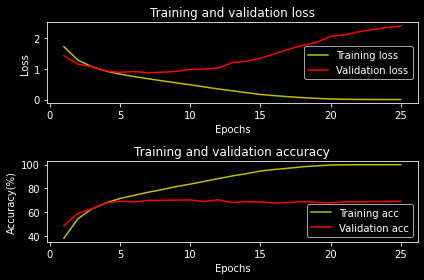

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('dark_background')

import keras
from keras.datasets import cifar10
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import os
from keras.layers import Flatten, Dense
from keras.optimizers import SGD
from keras.layers import Input
from keras.models import Model

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


input_img = Input(shape = (32, 32, 3))


tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_1)
tower_1 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_1)
tower_1 = MaxPooling2D((3,3), strides=(1,1), padding='same')(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_1)

output = Flatten()(tower_1)
out    = Dense(10, activation='softmax')(output)

model = Model(inputs = input_img, outputs = out)
print(model.summary())


epochs = 25
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

plt.figure()  # create a plot figure
# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# create the second panel and set current axis
plt.subplot(2, 1, 2)

acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, [x*100 for x in acc], 'y', label='Training acc')
plt.plot(epochs, [x*100 for x in val_acc], 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.tight_layout()
plt.show()



**2_ Adding Dropout layer  to code:**

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_12 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 64)        4160      
_________________________________________________________________
dropout_14 (Dropout)         (None, 32, 32, 64)        0   

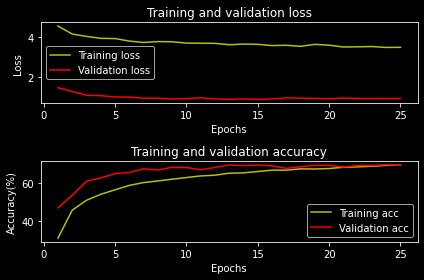

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('dark_background')

import keras
from keras.datasets import cifar10
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import os
from keras.layers import Flatten, Dense
from keras.optimizers import SGD
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import Model


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


input_img = Input(shape = (32, 32, 3))


tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Dropout(0.2)(tower_1)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
tower_1 = Dropout(0.2)(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_1)
tower_1 = Dropout(0.2)(tower_1)
tower_1 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_1)
tower_1 = Dropout(0.2)(tower_1)
tower_1 = MaxPooling2D((3,3), strides=(1,1), padding='same')(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_1)
tower_1 = Dropout(0.2)(tower_1)

output = Flatten()(tower_1)
output = Dropout(0.2)(output)
out    = Dense(10, activation='softmax')(output)
out    = Dropout(0.2)(out)


model = Model(inputs = input_img, outputs = out)
print(model.summary())


epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


plt.figure()  # create a plot figure
# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# create the second panel and set current axis
plt.subplot(2, 1, 2)

acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, [x*100 for x in acc], 'y', label='Training acc')
plt.plot(epochs, [x*100 for x in val_acc], 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.tight_layout()
plt.show()


**3_ Changing layers:**

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_28 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_29 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 16, 16, 64)       

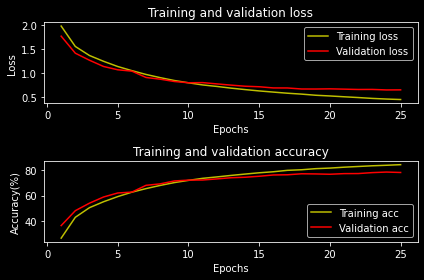

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('dark_background')

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.constraints import maxnorm
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import os
from keras.layers import Flatten, Dense
from keras.optimizers import SGD
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import Model


# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

# Fit the model
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


plt.figure()  # create a plot figure
# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# create the second panel and set current axis
plt.subplot(2, 1, 2)

acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, [x*100 for x in acc], 'y', label='Training acc')
plt.plot(epochs, [x*100 for x in val_acc], 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.tight_layout()
plt.show()